In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/health_data/health_risk_data.csv')

In [5]:
data = data.dropna()
data.isnull().sum()

Age                  0
BMI                  0
Blood_Pressure       0
Cholesterol          0
Smoking_Status       0
Physical_Activity    0
Diet_Quality         0
Health_Risk_Score    0
dtype: int64

In [6]:
data.head()

,Age,BMI,Blood_Pressure,Cholesterol,Smoking_Status,Physical_Activity,Diet_Quality,Health_Risk_Score
0,58,28.598790,125,203,No,High,Poor,7
1,71,33.664904,173,153,Yes,Medium,Poor,6
2,48,19.799615,161,235,Yes,Medium,Poor,7
3,34,27.917254,125,219,Yes,Low,Good,1
4,62,23.810537,129,200,Yes,Low,Average,8


In [7]:
data = {
    'Age': np.random.randint(20, 80, size=100),
    'BMI': np.random.uniform(18, 35, size=100),
    'Blood_Pressure': np.random.randint(90, 180, size=100),
    'Cholesterol': np.random.randint(150, 250, size=100),
    'Smoking_Status': np.random.choice(['Yes', 'No'], size=100),
    'Physical_Activity': np.random.choice(['Low', 'Medium', 'High'], size=100),
    'Diet_Quality': np.random.choice(['Poor', 'Average', 'Good'], size=100),
    'Health_Risk_Score': np.random.randint(1, 10, size=100)
}

In [8]:
df = pd.DataFrame(data)

In [9]:
label_encoders = {}
for column in ['Smoking_Status', 'Physical_Activity', 'Diet_Quality']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [10]:
df = df.fillna(df.mean())

# Select features and target variable
X = df.drop('Health_Risk_Score', axis=1)
y = df['Health_Risk_Score']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 1.96
Root Mean Squared Error: 2.41
R-squared: 0.09


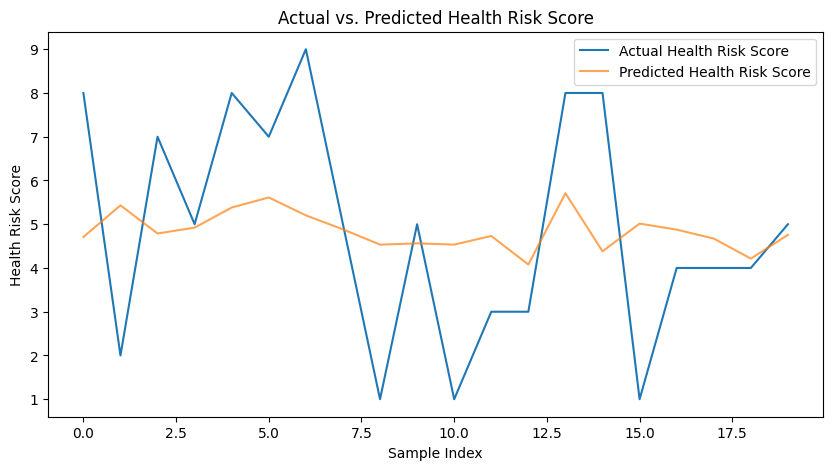

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Health Risk Score')
plt.plot(y_pred, label='Predicted Health Risk Score', alpha=0.7)
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Health Risk Score')
plt.title('Actual vs. Predicted Health Risk Score')
plt.show()

In [16]:
def predict_health_risk_score(age, bmi, blood_pressure, cholesterol, smoking_status, physical_activity, diet_quality, scaler, model):
    # Encode categorical variables
    smoking_status = label_encoders['Smoking_Status'].transform([smoking_status])[0]
    physical_activity = label_encoders['Physical_Activity'].transform([physical_activity])[0]
    diet_quality = label_encoders['Diet_Quality'].transform([diet_quality])[0]

    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Age': [age],
        'BMI': [bmi],
        'Blood_Pressure': [blood_pressure],
        'Cholesterol': [cholesterol],
        'Smoking_Status': [smoking_status],
        'Physical_Activity': [physical_activity],
        'Diet_Quality': [diet_quality]
    })
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return prediction[0]

In [17]:
new_data = [
    {"age": 55, "bmi": 28, "blood_pressure": 130, "cholesterol": 210, "smoking_status": "No", "physical_activity": "Medium", "diet_quality": "Good"},
    {"age": 40, "bmi": 22, "blood_pressure": 115, "cholesterol": 180, "smoking_status": "Yes", "physical_activity": "High", "diet_quality": "Average"}
]

for data in new_data:
    prediction = predict_health_risk_score(data['age'], data['bmi'], data['blood_pressure'], data['cholesterol'], data['smoking_status'], data['physical_activity'], data['diet_quality'], scaler, model)
    print(f"Age: {data['age']}, BMI: {data['bmi']}, Blood Pressure: {data['blood_pressure']}, Cholesterol: {data['cholesterol']}, Health Risk Score: {prediction:.2f}")


Age: 55, BMI: 28, Blood Pressure: 130, Cholesterol: 210, Health Risk Score: 4.83
Age: 40, BMI: 22, Blood Pressure: 115, Cholesterol: 180, Health Risk Score: 5.07


In [20]:
while True:
    try:
        age = float(input("Enter your age: "))
        bmi = float(input("Enter your BMI: "))
        blood_pressure = float(input("Enter your blood pressure: "))
        cholesterol = float(input("Enter your cholesterol level: "))
        smoking_status = input("Are you a smoker? (Yes/No): ").strip().capitalize()
        physical_activity = input("Enter your physical activity level (Low/Medium/High): ").strip().capitalize()
        diet_quality = input("Enter your diet quality (Poor/Average/Good): ").strip().capitalize()

        prediction = predict_health_risk_score(age, bmi, blood_pressure, cholesterol, smoking_status, physical_activity, diet_quality, scaler, model)
        print(f"Predicted Health Risk Score: {prediction:.2f}\n")
    except ValueError:
        print("Invalid input. Please enter valid values.")
    quit_input = input("Do you want to predict another health risk score? (yes/no): ")
    if quit_input.lower() != 'yes':
        break
print("THANK YOU!")

Enter your age: 35
Enter your BMI: 83
Enter your blood pressure: 85
Enter your cholesterol level: 84
Are you a smoker? (Yes/No): yes
Enter your physical activity level (Low/Medium/High): Medium
Enter your diet quality (Poor/Average/Good): good
Predicted Health Risk Score: 9.97

Do you want to predict another health risk score? (yes/no): no
THANK YOU!
